<a href="https://colab.research.google.com/github/pratyush011/digital_college/blob/master/COVID_19_Visualizations%2C_Predictions%2C_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is COVID-19?

COVID-19 is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. The virus can spread from person to person, but good hygiene can prevent infection.

### Related Information about COVID-19

COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month. 

The sole reason to Flatten the Curve is to reudce the load on the Medical Systems so as to increase the focus of Research to find the Medicine for the disease.

Every Pandemic has four stages:

Stage 1: Confirmed Cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission

Stage 4: Significant Transmission with no end in sight

Italy, USA, UK and France are the two countries which are currently in Stage 4
While India is in on the edge of Stage 3.

Other ways to tackle the disease like Corona other than Travel Ban, Cross-Border shutdown, Ban on immigrants are Testing, Contact Tracing and Quarantine.

#### Interesting YouTube Videos related to COVID-19
Gravitas: Why is the WHO Director General toeing China's line? | Coronavirus: 
https://www.youtube.com/watch?v=O1NGzmDVWxA

Gravitas: Demand grows for W.H.O Boss' resignation:
https://www.youtube.com/watch?v=J8TfKok9Rns&t=157s

Gravitas: Wuhan Coronavirus, countries that are setting an example for the world:
https://www.youtube.com/watch?v=peBNIHRtUY8&t=298s

Gravitas: Wuhan Coronavirus, Is China downplaying the number of victims?:
https://www.youtube.com/watch?v=0VEcyEhrtgI

Gravitas: UNSC fails to pin responsibility on China | Coronavirus:
https://www.youtube.com/watch?v=op43xZ1XMQY

Gravitas: Will China change its eating habits? | Wuhan Coronavirus:
https://www.youtube.com/watch?v=wjGw36K0RCU

Gravitas: Taiwan unearths China's 'Fake apology' plot | Coronavirus outbreak
https://www.youtube.com/watch?v=3kLYAiv4TkA

Leaders around the world determined to flatten the COVID-19 curve | Coronavirus | World News:
https://www.youtube.com/watch?v=licXTAyMx3c&list=WL&index=2&t=164s

### Objective of the Notebook

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days. 

## Let's get Started

## Importing required Python Packages and Libraries

In [0]:
!pip install -q kaggle

In [0]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json

token = {"username":"pratyush011","key":"1ff31c89f35982dde94b926ddd5e31e3"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


KeyboardInterrupt: ignored

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -p /content

In [0]:
!unzip \*.zip

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pyramid-arima
from pyramid.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
std=StandardScaler()
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [0]:
covid=pd.read_csv("/content/covid_19_data.csv")
covid.head()

In [0]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

In [0]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["SNo"],1,inplace=True)

In [0]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

## Datewise analysis 

In [0]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [0]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

In [0]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

#### Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#### Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead.

In [0]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

#### Closed Cases = Number of Recovered Cases + Number of Death Cases 
#### Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

In [0]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

##### Please note the 18th week has just started

The death toll was low in 14th week, as it was expected to rise looking at the trend of infection of death trend of previous few weeks.

15th and 16th Week showed small dip in number of Death cases followed by 17th week, as compared to 14th Week. Showing we are somehow able to reduce the Death cases. 

The considerable dip in Death cases since past few weeks is really really motivating, but we are still not able to get  control over new infections.

#### Growth rate of Confirmed, Recovered and Death Cases 

In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### Moratality and Recovery Rate analysis around the World

In [0]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
#### Mortality rate is showing a considerable for a pretty long time, which is positive sign
#### Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

In [0]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

### Growth Factor
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign, whereas a **growth factor constantly above 1 is the sign of exponential growth**.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

In [0]:
print("Average growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).median())

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

#### Growth Factor for Active and Closed Cases
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Active and Closed Cases) / new (Active and Closed Cases) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases.**

A growth factor **above 1 but trending downward is a positive sign.**

A growth factor **constant at 1 indicates there is no change in any kind of cases.**

A growth factor **below 1 indicates real positive sign implying more patients are getting recovered or dying as compared to the Confirmed Cases.**

In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])/(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["Recovered"]+datewise["Deaths"])/(datewise["Recovered"]+datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

#### Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases.

### Rate of Doubling for Confirmed Cases around the World

In [0]:
c=1000
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days Since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

In [0]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
doubling_rate

#### Doubling Rate is fluctuating very much, which ideally supposed to increase if we are successfully faltening the curve.

### Number of days requried for increase in Confirmed Cases by 200K

In [0]:
c1=100000
days_200k=[]
C1=[]
while(1):
    days_200k.append(datewise[datewise["Confirmed"]<=c1].iloc[[-1]]["Days Since"][0])
    C1.append(c1)
    c1=c1+200000
    if(c1<datewise["Confirmed"].max()):
        continue
    else:
        break

In [0]:
rate_200k=pd.DataFrame(list(zip(C1,days_200k)),columns=["No. of Cases","Days Since first Case"])
rate_200k["Days requried for rise of 200K"]=rate_200k["Days Since first Case"].diff().fillna(rate_200k["Days Since first Case"].iloc[[0]][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=rate_200k["No. of Cases"], y=rate_200k["Days requried for rise of 200K"].dt.days,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.update_layout(title="Number of Days required for increase in number of cases by 200K",
                 xaxis_title="Number of Cases",yaxis_title="Number of Days")
fig.show()

It's hardly taking a day or two for rise in cases by 100,000, which is pretty much a clear indication that we are still not able to "Flatten the curve"

## Countrywise Analysis

In [0]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

Tourist Data: https://worldpopulationreview.com/countries/most-visited-countries/

International Students Data: https://www.easyuni.com/advice/top-countries-with-most-international-students-1184/
#### If we check the list of countries in accordance to number tourists visiters from link mentioned above, Top countries are mainly France, Spain, USA, China, Italy, Mexico, UK, Turkey, Germany, Thailand. Another thing to take into account most of the countries mentioned above also have highest number of International Students. All of the them are the most affected countries because of COVID-19

#### Another interesting thing to see is the median age of worst affected countries.
We can check that here
*Countrywise Median Age*: https://ourworldindata.org/age-structure

#### Top 25 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

#### No Recovered Patients with considerable Mortality Rate

In [0]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')

#### Serbia was a country which had more than 50 Confirmed Cases with no Recovered patient for a very long time. Right now above countries have No Recovered Patients, but comparitively low number of Confirmed Cases

#### Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate

In [0]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="Reds")

#### Vietnam has able to contain COVID-19 pretty well with no Deaths recorded so far with pretty healthy Recovery Rate. Just for information Vietnam was the first country to inform World Health Organization about Human to Human Transmission of COVID-19. 

#### Vietnam and Cambodia will soon be free from COVID-19.

All the above countries are showing amazing recovery rate as well and will be fully completely get over COVID-19 very soon.

Gravitas: Wuhan Coronavirus: Taiwan's big claim against WHO:
https://www.youtube.com/watch?v=USTJUqe_fdk

WHO releases statement after senior staff’s awkward interview
https://www.youtube.com/watch?v=wFRHB-wP9SU&feature=youtu.be&fbclid=IwAR1_wXFXq_qG17VZhA4nivmlm8ZWjHD1W0ozYS70YjgBsmfXwRGE_l26ZVU

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [0]:
#.loc instead of .ix (ix is not supported in the latest panda version 
country_date=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.loc[country].shape[0]
    confirm_rate.append((countrywise.loc[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")

#### Mainland China has recorded highest number of Closed cases as thier Recovery Rate is staggering recording 85%+
#### Confirmed Cases/Day is clear indication of why US has highest number of Active Cases currently. The rate is 11000+ cases per day. Showing increase in that value every day.

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

#### Survival Probability is the only graph that looks the most promising! Having average survival probability of 95%+ across all countries. The difference between Mean and Median Death Probability is an clear indication that there few countries with really high mortality rate e.g. Italy, Algeria, UK etc.

## Journey of different Countries in COVID-19

#### When we see daily news reports on COVID-19 it's really hard to interpret what's actually happening, since the numbers are changing so rapidly but that's something expected from Exponential growth. Since almost all the pandemics tend to grow exponentially it's really hard to understand for someone from a non-mathematical or non-statistical background.

#### We are more concerned about how we are doing and where we are heading in this pandemic rather than just looking at those exponentially growing numbers. The growth won't be exponentially forever, at some point of time the curve will become flat because probably all the people on the planet are infected or we human have been able to control the disease.

#### When we are in the middle of the exponential growth it's almost impossible to tell where are we heading.
Here, I am trying to show how we can interpret the exponential growth which is the common trend among all the countries

References:
How To Tell If We're Beating COVID-19: https://www.youtube.com/watch?v=54XLXg4fYsc

Exponential growth and epidemics: https://www.youtube.com/watch?v=Kas0tIxDvrg

In [0]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [0]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

In [0]:
#.loc instead of .ix (ix is not supported in the latest panda version 

plt.figure(figsize=(15,10))
for country in countrywise.head(10).index:
    sns.lineplot(x=grouped_country.loc[country]["log_confirmed"],y=grouped_country.loc[country]["log_active"],
                 label=country,linewidth=3)
plt.xlabel("Confirmed Cases (Logrithmic Scale)")
plt.ylabel("Active Cases (Logarithmic Scale)")
plt.title("COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases")

It's pretty evident that the disease is spreading in same manner everywhere, but if particular country is following pandemic controlling practices rigrously the results are evident in the graph.

Most of the countries will follow the same trajectory as that USA, which is **"Uncontrolled Exponential Growth"** 

There are few countries where the pandemic controlling practices seems to be working accurately, few classic examples are China, Germany, Italy, Spain, Turkey has started showing that dip indicating there are somehow got control over COVID-19

Countries like United Kingdom, Russia are following similar lines as that of United States, indicating the growth is still exponential among those countries.

Iran is showing some occasional drops.

## Clustering of Countries

The clustering of countries can be done considering different features. Here I'm trying to cluster different countries based on the Mortality and Recovery rate of indivisual country.

As we all are well aware that COVID-19 has different Mortality Rate among different countries based on different factors and so is the Recovery Rate because of pandemic controlling practices followed by the individual country. Also Mortality Rate and Recovery Rate both togther takes into account all types of cases Confirmed, Recoverd and Deaths.

Let's checkout how these clusters look like!

In [0]:
X=countrywise[["Mortality","Recovery"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [0]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

In [0]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

All the three methods namely Elbow Method, Silhouette Score and Hierarchical Clustering shows **K=3** will correct number of clusters.

In [0]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

In [0]:
countrywise["Clusters"]=clf_final.predict(X)

#### Summary of Clusters

In [0]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

NameError: ignored

In [0]:
print("Avergae Mortality Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Recovery"],y=countrywise["Mortality"],hue=countrywise["Clusters"],s=100)
plt.axvline(((datewise["Recovered"]/datewise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((datewise["Deaths"]/datewise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend()

In [0]:
print("Few Countries belonging to Cluster 0: ",list(countrywise[countrywise["Clusters"]==0].head(10).index))
print("Few Countries belonging to Cluster 1: ",list(countrywise[countrywise["Clusters"]==1].head(10).index))
print("Few Countries belonging to Cluster 2: ",list(countrywise[countrywise["Clusters"]==2].head(10).index))

Cluster 0 is a set of countries which have really **High Mortality Rate** and consdierably **Good Recovery Rate**. Basically few countries among these clusters have seen already the worst of this pandemic but are now recovering with healty Recovery Rate.

Cluster 1 is set of countries which have **Low Mortality Rate** and really **High Recovery Rate**. These are the set of countries who has been able to control the COVID-19 by following pandemic controlling practices rigorously. 

Cluster 2 is set of countries which have **Low Mortality Rate** and really **Low Recovery Rate**. These countries need to pace up their Revovery Rate to get out it, Some thses countries have really high number of Infected Cases but Low Mortality is positive sign out of it.

### Comparison of China, Italy, US, Spain and Rest of the World

In [0]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
brazil_data=covid[covid["Country/Region"]=="Brazil"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Spain")&(covid["Country/Region"]!="Brazil")]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Brazil=brazil_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,28))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed Cases of USA",linewidth=3)
ax1.plot(datewise_Spain["Confirmed"],label="Confirmed Cases of Spain",linewidth=3)
ax1.plot(datewise_Brazil["Confirmed"],label="Confirmed Cases of Brazil",linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="Recovered Cases of US",linewidth=3)
ax2.plot(datewise_Spain["Recovered"],label="Recovered Cases Spain",linewidth=3)
ax2.plot(datewise_Brazil["Recovered"],label="Recovered Cases Brazil",linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Death Cases of US',linewidth=3)
ax3.plot(datewise_Spain["Deaths"],label='Death Cases Spain',linewidth=3)
ax3.plot(datewise_Brazil["Deaths"],label='Death Cases Brazil',linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",linewidth=3)
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

#### China has been able to "flatten the curve" looking at their graphs of Confirmed and Death Cases. With staggering Recovery Rate.
#### US seems to have good control on Deaths, but number of people getting affected is going way out of hand.

In [0]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Spain["Mortality"]=(datewise_Spain["Deaths"]/datewise_Spain["Confirmed"])*100
datewise_Brazil["Mortality"]=(datewise_Brazil["Deaths"]/datewise_Brazil["Confirmed"])*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100

datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Spain["Recovery"]=(datewise_Spain["Recovered"]/datewise_Spain["Confirmed"])*100
datewise_Brazil["Recovery"]=(datewise_Brazil["Recovered"]/datewise_Brazil["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100

In [0]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=3)
ax1.plot(datewise_US["Mortality"],label="Mortality Rate of USA",linewidth=3)
ax1.plot(datewise_Spain["Mortality"],label="Mortality Rate of Spain",linewidth=3)
ax1.plot(datewise_Brazil["Mortality"],label="Mortality Rate of Brazil",linewidth=3)
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",linewidth=3)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=3)
ax2.plot(datewise_US["Recovery"],label="Recovery Rate of USA",linewidth=3)
ax2.plot(datewise_Spain["Recovery"],label="Recovery Rate of Spain",linewidth=3)
ax2.plot(datewise_Brazil["Recovery"],label="Recovery Rate of Brazil",linewidth=3)
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",linewidth=3)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

#### Taking off Recovery Rate of Spain is a good sign but it's nowhere in comparison to the Moratality Rate.
#### Its alarming sign for USA and Brazil as their Recovery Rate is improving considerably as compared to other severly affected countries.

In [0]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (China)',linewidth=3)
ax1.plot(datewise_Italy["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Italy)',linewidth=3)
ax1.plot(datewise_US["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (USA)',linewidth=3)
ax1.plot(datewise_Spain["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Spain)',linewidth=3)
ax1.plot(datewise_Brazil["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Brazil)',linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Rest of the World)',linewidth=3)
ax1.set_xlabel('Date')
ax1.set_ylabel("Increase in Number of Confirmed Cases")
ax1.set_title("Daily increase in Confirmed Cases")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (China)',linewidth=3)
ax2.plot(datewise_Italy["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Italy)',linewidth=3)
ax2.plot(datewise_US["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (USA)',linewidth=3)
ax2.plot(datewise_Spain["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Spain)',linewidth=3)
ax2.plot(datewise_Brazil["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Brazil)',linewidth=3)
ax2.plot(datewise_restofworld["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Rest of the World)',linewidth=3)
ax2.set_xlabel('Date')
ax2.set_ylabel("Increase in Number of Death Cases")
ax2.set_title("Daily increase in Death Cases")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

#### We can clearly notice the decreasing trend in the number of Daily Confirmed and Death Cases of Spain and Italy. That's really positive sign for both the countries. 

## Data Analysis for India 

### For detailed Data analysis and Forecasting specific to India
### Please checkout my Kernel: 
### Click Here: [COVID-19 Data Analysis & Forecasting for India](https://www.kaggle.com/neelkudu28/covid-19-data-analysis-forecasting-for-india)

The notebook consists of detailed data analysis specific to India, Comparison of India with the neighboring countries, Comparison with worst affected countries in this pandemic and try and build Machine Learnig Prediction and Time Series and Forecasting models to try and understand the how the numbers are going to be in near future.

In [0]:
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
fig=px.bar(x=datewise_india.index,y=datewise_india["Confirmed"]-datewise_india["Recovered"]-datewise_india["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases in India",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [0]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,1)
india_increase_recover.insert(0,1)
india_increase_deaths.insert(0,1)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_confirm,
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_recover,
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_increase_deaths,
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear

week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekOfYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekOfYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
    
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("India's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("India's Weekwise increase in Number of Death Cases")

In [0]:
max_ind=datewise_india["Confirmed"].max()
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Italy",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases USA",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Spain",linewidth=3)
plt.plot(datewise_india[datewise_india["Confirmed"]>0]["Confirmed"],label="Confirmed Cases India",linewidth=3)
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
plt.title("Growth of Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")

#### Comparison of Daily Increase in Number of Cases of Italy, Spain, USA and India, where maximum number of Confirmed Cases are equivalent to maximum number of Confirmed Cases in India

In [0]:
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Italy",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Spain",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in US",linewidth=3)
plt.plot(datewise_india[datewise_india["Confirmed"]>0]["Confirmed"].diff().fillna(0),label="Confirmed Cases India",linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Daily increase in Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

#### Videos related to COVID-19 Pandemic in India
Wuhan Coronavirus: WION breaks down the growing numbers | Gravitas: 
https://www.youtube.com/watch?v=xqAPDD8sw-g

## Prediction using Machine Learning Models

#### Linear Regression Model for Confirm Cases Prediction

In [0]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [0]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [0]:
lin_reg=LinearRegression(normalize=True)

In [0]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

In [0]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [0]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

In [0]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear.

#### Polynomial Regression for Prediction of Confirmed Cases

In [0]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [0]:
poly = PolynomialFeatures(degree = 8) 

In [0]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [0]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  79624.53553181411


In [0]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [0]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

#### Support Vector Machine ModelRegressor for Prediction of Confirmed Cases 

In [0]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [0]:
#Intializing SVR Model
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

In [0]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [0]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  457264.63458468625


In [0]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [0]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(linreg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

ValueError: ignored

In [0]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction


Predictions of Linear Regression are nowhere close to actual values.

## Time Series Forecasting 

#### Holt's Linear Model

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]

In [0]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.1, smoothing_slope=1.1,optimized=False)
y_pred=valid.copy()

In [0]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  8727.48784602069


In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,NaN,NaN,NaN,NaN,5185050.171547
1,NaN,NaN,NaN,NaN,5277357.157595
2,NaN,NaN,NaN,NaN,5369664.143644
3,NaN,NaN,NaN,NaN,5461971.129692
4,NaN,NaN,NaN,NaN,5554278.115741


#### Holt's Winter Model for Daily Time Series

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=5,trend='mul', seasonal='mul').fit()

In [0]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))

In [0]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  13189.244459053132


In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469,5133690.643079,5158100.330609
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408,5220012.275163,5244073.553582
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126,5302616.404695,5331117.896061
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963,5383528.802657,5415592.521583
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103,5465078.653090,5508065.384692


In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

### AR Model (using AUTO ARIMA)

In [0]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0); AIC=2320.377, BIC=2325.814, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0); AIC=2318.676, BIC=2326.832, Fit time=0.049 seconds
Fit ARIMA: order=(2, 2, 0); AIC=2317.253, BIC=2328.127, Fit time=0.073 seconds
Fit ARIMA: order=(3, 2, 0); AIC=2317.944, BIC=2331.537, Fit time=0.219 seconds
Fit ARIMA: order=(4, 2, 0); AIC=2316.402, BIC=2332.713, Fit time=0.233 seconds
Fit ARIMA: order=(5, 2, 0); AIC=2316.423, BIC=2335.453, Fit time=0.436 seconds
Total fit time: 1.024 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(4, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [0]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [0]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  6635.471967831999


In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469,5133690.643079,5158100.330609
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408,5220012.275163,5244073.553582
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126,5302616.404695,5331117.896061
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963,5383528.802657,5415592.521583
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103,5465078.653090,5508065.384692


### MA Model (using AUTO ARIMA)

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0); AIC=2320.377, BIC=2325.814, Fit time=0.004 seconds
Fit ARIMA: order=(0, 2, 1); AIC=2316.481, BIC=2324.636, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 2); AIC=2314.208, BIC=2325.082, Fit time=0.034 seconds
Fit ARIMA: order=(0, 2, 3); AIC=2316.137, BIC=2329.729, Fit time=0.055 seconds
Total fit time: 0.122 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [0]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [0]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))

Root Mean Square Error for MA Model:  8938.238219082603


In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469,5133690.643079,5158100.330609
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408,5220012.275163,5244073.553582
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126,5302616.404695,5331117.896061
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963,5383528.802657,5415592.521583
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103,5465078.653090,5508065.384692


### ARIMA Model (using AUTOARIMA)

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=4,max_q=4,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

Fit ARIMA: order=(1, 2, 1); AIC=2314.850, BIC=2325.724, Fit time=0.137 seconds
Fit ARIMA: order=(1, 2, 2); AIC=2316.148, BIC=2329.741, Fit time=0.238 seconds
Fit ARIMA: order=(1, 2, 3); AIC=2312.375, BIC=2328.686, Fit time=0.249 seconds
Fit ARIMA: order=(1, 2, 4); AIC=2312.023, BIC=2331.052, Fit time=0.430 seconds
Fit ARIMA: order=(2, 2, 1); AIC=2315.932, BIC=2329.525, Fit time=0.190 seconds
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 1); AIC=2317.466, BIC=2333.777, Fit time=0.273 seconds
Fit ARIMA: order=(3, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 1); AIC=2317.271, BIC=2336.301, Fit time=0.364 seconds
Fit ARIMA: order=(4, 2, 2); AIC=nan, BIC=nan,

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [0]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [0]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  8048.211445821075


In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469,5133690.643079,5158100.330609
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408,5220012.275163,5244073.553582
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126,5302616.404695,5331117.896061
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963,5383528.802657,5415592.521583
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103,5465078.653090,5508065.384692


### SARIMA Model (using AUTO ARIMA)

In [0]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=4,max_q=4,m=12,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Fit ARIMA: order=(2, 2, 1) seasonal_order=(1, 0, 1, 12); AIC=2315.527, BIC=2334.557, Fit time=0.353 seconds
Total fit time: 13.702 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=2319.292, BIC=2330.166, Fit time=0.250 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=2320.377, BIC=2325.814, Fit time=0.011 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=2317.416, BIC=2328.290, Fit time=0.087 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=2315.345, BIC=2326.219, Fit time=0.088 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 0, 1, 12); AIC=2315.078, BIC=2328.670, Fit time=0.244 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 0, 0, 12); AIC=2316.599, BIC=2327.473, Fit time=0.096 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 0, 2, 12); AIC=2316.830, BIC=2333.141, Fit time=1.208 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=2316.828, BIC=2324.984, Fit time=0.036 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(2, 0, 2, 12); AIC=2318.829, BIC=2337.859, Fit time=1.475 seconds
Fit ARIMA: order=(1, 2, 1) s

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [0]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [0]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  7420.679685678358
Root Mean Square Error for SARIMA Model:  7420.679685678358


In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103


,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469,5133690.643079,5158100.330609
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408,5220012.275163,5244073.553582
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126,5302616.404695,5331117.896061
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963,5383528.802657,5415592.521583
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103,5465078.653090,5508065.384692


### Facebook's Prophet Model for forecasting 

In [0]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [0]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [0]:
confirmed_forecast=prophet_c.predict(forecast_c)
#print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

In [0]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  12064.051241474766
Root Mean Squared Error for Prophet Model:  12064.051241474766


Figure(720x432)


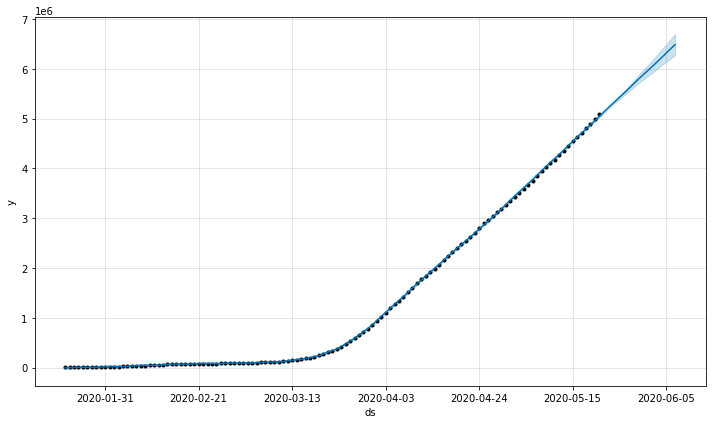

Figure(720x432)


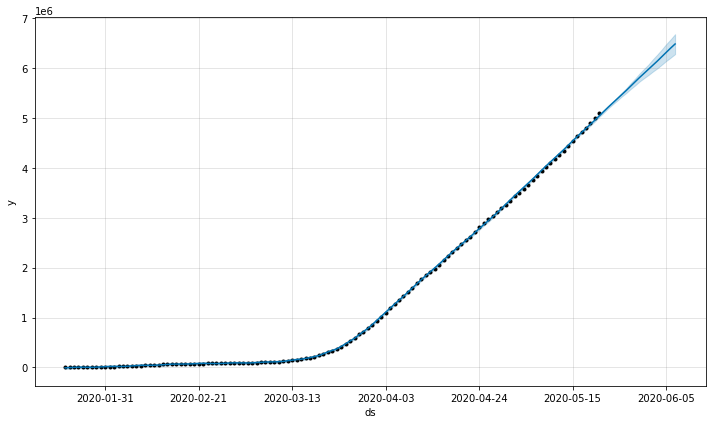

In [0]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


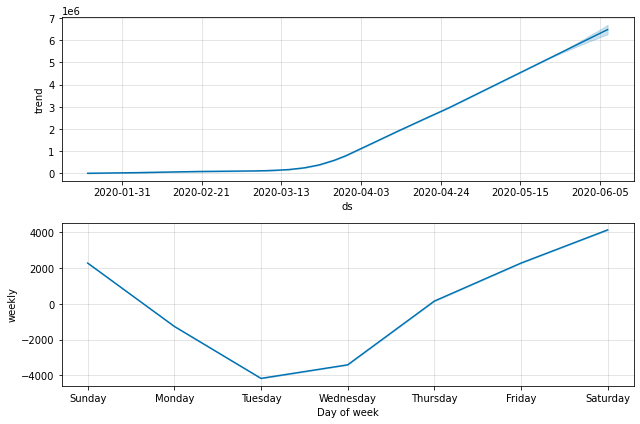

Figure(648x432)


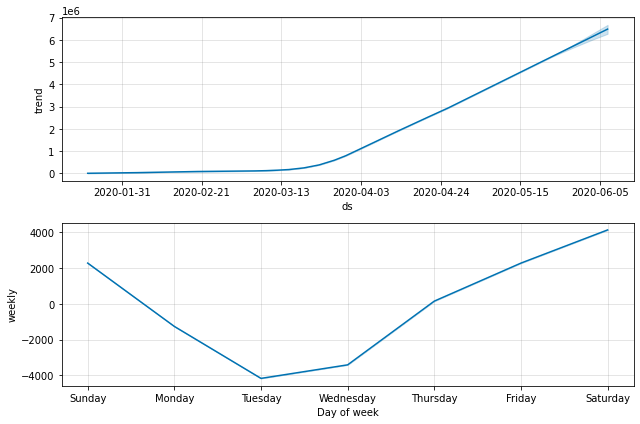

In [0]:
print(prophet_c.plot_components(confirmed_forecast))

#### Summarization of Forecasts using different Models

In [0]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Holt's Linear","Holt's Winter Model",
            "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model","SARIMA Model","Facebook's Prophet Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
6,Moving Average Model (MA),6635.471968
9,Facebook's Prophet Model,7420.679686
8,SARIMA Model,8048.211446
4,Holt's Winter Model,8727.487846
7,ARIMA Model,8938.238219
5,Auto Regressive Model (AR),13189.244459
0,Linear Regression,79624.535532
2,Support Vector Machine Regressor,79624.535532
1,Polynomial Regression,457264.634585
3,Holt's Linear,457264.634585


,Model Name,Root Mean Squared Error
6,Moving Average Model (MA),6635.471968
9,Facebook's Prophet Model,7420.679686
8,SARIMA Model,8048.211446
4,Holt's Winter Model,8727.487846
7,ARIMA Model,8938.238219
5,Auto Regressive Model (AR),13189.244459
0,Linear Regression,79624.535532
2,Support Vector Machine Regressor,79624.535532
1,Polynomial Regression,457264.634585
3,Holt's Linear,457264.634585


In [0]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469,5133690.643079,5158100.330609
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408,5220012.275163,5244073.553582
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126,5302616.404695,5331117.896061
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963,5383528.802657,5415592.521583
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103,5465078.653090,5508065.384692


,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,NaN,NaN,NaN,NaN,5185050.171547,5206723.595269,5191314.276274,5199447.918724,5180205.531240,5198696.091469,5133690.643079,5159020.128447
1,NaN,NaN,NaN,NaN,5277357.157595,5315229.034149,5288380.457504,5297540.979773,5275311.502696,5298931.162408,5220012.275163,5243771.113163
2,NaN,NaN,NaN,NaN,5369664.143644,5420069.137739,5386292.700838,5396447.650341,5371196.259357,5402752.815126,5302616.404695,5328187.202562
3,NaN,NaN,NaN,NaN,5461971.129692,5519883.314651,5485098.270293,5496167.930429,5467858.514099,5505468.342963,5383528.802657,5414305.114775
4,NaN,NaN,NaN,NaN,5554278.115741,5633349.418807,5584718.818099,5596701.820035,5565297.250546,5609607.272103,5465078.653090,5504089.621722


### Time Series Forecasting for Death Cases

In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Death Cases"))
fig.update_layout(title="Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [0]:
model_arima_deaths=auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,
                              max_p=4,max_q=4,suppress_warnings=True,stepwise=False,seasonal=False)     
model_arima_deaths.fit(model_train["Deaths"])

Fit ARIMA: order=(0, 2, 0); AIC=1865.000, BIC=1870.437, Fit time=0.003 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1865.608, BIC=1873.763, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1857.610, BIC=1868.484, Fit time=0.061 seconds
Fit ARIMA: order=(0, 2, 3); AIC=1852.583, BIC=1866.175, Fit time=0.100 seconds
Fit ARIMA: order=(0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0); AIC=1865.985, BIC=1874.141, Fit time=0.055 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1856.478, BIC=1867.352, Fit time=0.104 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1856.698, BIC=1870.290, Fit time=0.141 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1853.912, BIC=1870.223, Fit time=0.113 seconds
Fit ARIMA: order=(1, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 0); AIC=1867.036, BIC=1877.910, Fit time=0.075 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1854.285, BIC=1867.877, Fit time=0.117 seconds
Fit ARIMA: order=(2, 2, 2); AIC=1831.344, BIC=1847.655, Fit time=0.250 secon

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

Fit ARIMA: order=(0, 2, 0); AIC=1865.000, BIC=1870.437, Fit time=0.004 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1865.608, BIC=1873.763, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1857.610, BIC=1868.484, Fit time=0.060 seconds
Fit ARIMA: order=(0, 2, 3); AIC=1852.583, BIC=1866.175, Fit time=0.102 seconds
Fit ARIMA: order=(0, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0); AIC=1865.985, BIC=1874.141, Fit time=0.057 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1856.478, BIC=1867.352, Fit time=0.119 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1856.698, BIC=1870.290, Fit time=0.155 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1853.912, BIC=1870.223, Fit time=0.123 seconds
Fit ARIMA: order=(1, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 0); AIC=1867.036, BIC=1877.910, Fit time=0.076 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1854.285, BIC=1867.877, Fit time=0.116 seconds
Fit ARIMA: order=(2, 2, 2); AIC=1831.344, BIC=1847.655, Fit time=0.252 secon

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [0]:
predictions_deaths=model_arima_deaths.predict(len(valid))
y_pred["ARIMA Death Prediction"]=predictions_deaths

In [0]:
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(valid["Deaths"],predictions_deaths)))

Root Mean Square Error:  915.3365302279237
Root Mean Square Error:  915.3365302279237


In [0]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Train Data for Death Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Deaths"],
                    mode='lines+markers',name="Validation Data for Death Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Death Prediction"],
                    mode='lines+markers',name="Prediction for Death Cases",))
fig.update_layout(title="Death Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Death Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [0]:
ARIMA_model_death_forecast=[]
for i in range(1,18):
    ARIMA_model_death_forecast.append(model_arima_deaths.predict(len(valid)+i)[-1])

In [0]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Deaths","ARIMA Model Death Forecast"]).head()

,Deaths,ARIMA Model Death Forecast
0,2020-05-22,337865.979295


,Deaths,ARIMA Model Death Forecast
0,2020-05-22,337865.979295


## Conclusion

COVID-19 doesn't have very high mortatlity rate as we can see which is the most positive take away. Also the healthy Recovery Rate implies the disease is cureable. The only matter of concern is the exponential growth rate of infection. 

Countries like USA, Spain, United Kingdom,and Italy are facing some serious trouble in containing the disease showing how deadly the neglegence can lead to. The need of the hour is to perform COVID-19 pendemic controlling practices like Testing, Contact Tracing and Quarantine with a speed greater than the speed of disease spread at each country level.

![CO2%20Footprint.jpg](attachment:CO2%20Footprint.jpg)

The reason of putting this graph in the conclusion, there is an interesting pattern to observe here, Everytime there has been drop in World's Carbon emission, the world economy crashed. A one classic example is 2008 recession. I think most of you must have already guessed what's ahead, probably COVID-19 is just a big wave with a Tsunami of Recession or Depression following it. 

The growth of Confirmed and Death Cases seems to have slowed down since past few days. Which is really good sign. Hope this goes like that for a brief period. There should not be any new country emerging as the new epicenter of COVID-19 just like USA happened to be that epicenter for brief period. In case if any new country emerges as new epicenter, the Growth of Confirmed Cases will shoot up again.

### Will be updating the notebook with new Data Visualization Plot and new Prediction and Forecasting Models. Please upvote the kernel if you have liked the work. Also, any kind of suggestion and corrections would be highly appreciated!

## Stay Safe and follow basic hygiene Practices!